In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [27]:
data = pd.read_csv('/kaggle/input/ted-talks/data.csv')

In [28]:
data.shape

(5440, 6)

In [29]:
data.head(5)

,title,author,date,views,likes,link
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...


In [30]:
data.describe()

,views,likes
count,5.440000e+03,5.440000e+03
mean,2.061576e+06,6.260762e+04
std,3.567098e+06,1.076468e+05
min,5.320000e+02,1.500000e+01
25%,6.707500e+05,2.000000e+04
50%,1.300000e+06,4.050000e+04
75%,2.100000e+06,6.500000e+04
max,7.200000e+07,2.100000e+06


# Most Popular Ted Talks

The most popular TED talks in terms of views.

In [53]:
most_veiws=data.sort_values(by='views' ,ascending=False).head(10)
most_veiws[['author','title','views']]

,author,title,views
5436,Sir Ken Robinson,Do schools kill creativity?,72000000
4084,Amy Cuddy,Your body language may shape who you are,64000000
2958,Tim Urban,Inside the mind of a master procrastinator,60000000
4765,Simon Sinek,How great leaders inspire action,57000000
4605,Brené Brown,The power of vulnerability,56000000
3504,Julian Treasure,How to speak so that people want to listen,49000000
2168,Sam Berns,My philosophy for a happy life,43000000
3251,Bill Gates,The next outbreak? We're not ready,43000000
3017,Robert Waldinger,What makes a good life? Lessons from the longe...,41000000
3994,Cameron Russell,"Looks aren't everything. Believe me, I'm a model.",38000000


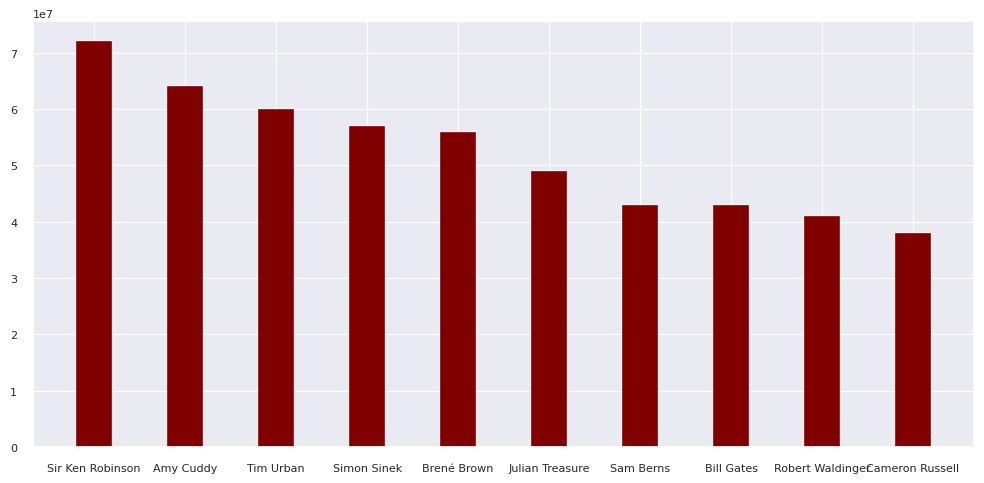

In [87]:
plt.style.use('seaborn-v0_8-paper')
plt.figure(figsize=(10,5))
x_label=most_veiws['author']
y_label=most_veiws['views']
plt.bar(x_label, y_label, color ='maroon', width = 0.4)
plt.tight_layout()
plt.show()

Finding the most popular TED talks Speaker (in terms of number of talks)

In [33]:
dt=data['author'].value_counts()
dt.head(10)

author
Alex Gendler        45
Iseult Gillespie    33
Matt Walker         18
Alex Rosenthal      15
Elizabeth Cox       13
Emma Bryce          12
Juan Enriquez       11
Daniel Finkel       11
Jen Gunter           9
Greg Gage            9
Name: count, dtype: int64

Extracting Date : Year and month

In [34]:
type(data['date'][0])

str

In [40]:
data['date']=pd.to_datetime(data['date'])
data['day']=data['date'].dt.year
data['month']=data['date'].dt.month

Month-wise Analysis of TED talk frequency

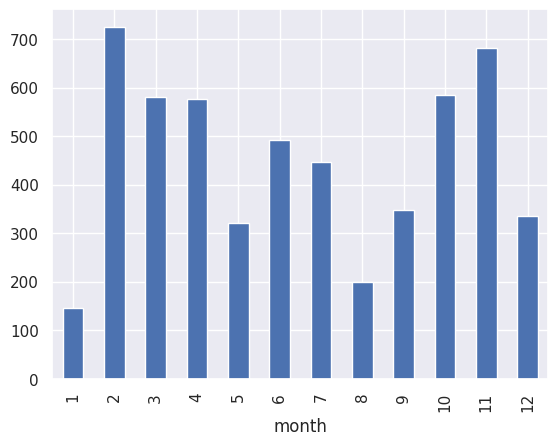

In [36]:
ted_data=data.groupby('month').size().plot(kind='bar')


Year-wise Analysis of TED talk frequency

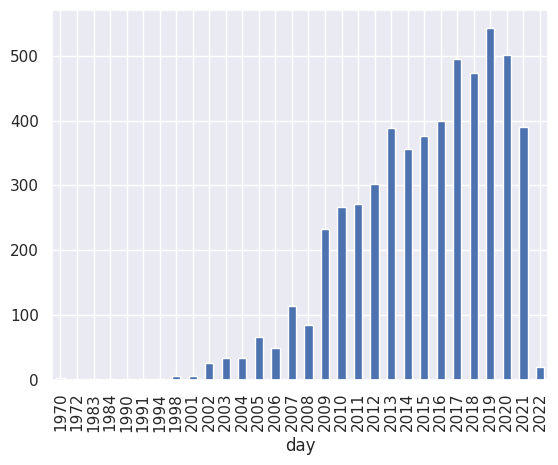

In [37]:
ted_data=data.groupby('day').size().plot(kind='bar')

Finding TED talks of your favorite Author

In [41]:
fav_author=input("enter your favourite author")
author_topic=data[data['author']==fav_author]
author_topic['title']

enter your favourite author Emma Bryce


47                      Why do cats have vertical pupils?
1369    What is HPV and how can you protect yourself f...
1909                     How does the immune system work?
1916                      The power of the placebo effect
2045                           How do your hormones work?
2617                                      Why do we itch?
2857                               How to use a semicolon
3175                                   What is a calorie?
3239    What really happens to the plastic you throw a...
3280         How does the thyroid manage your metabolism?
3595                  The case of the vanishing honeybees
3664                                  Should we eat bugs?
Name: title, dtype: object

Finding TED talks with the best view to like ration

In [ ]:
data['views_like']=data['views']/data['likes']
views_to_like=data.sort_values(by='views_like',ascending=False)
views_to_like['author'].head(10)

Finding TED talks based on tags(like climate)

In [42]:
search_by=input("enetr the topic of search")
for i in range(0,len(data)):
    if search_by in data['title'][i]:
        print(data[['author','title','date','views','likes']])

enetr the topic of search climate


                    author                                              title  \
0     Ozawa Bineshi Albert      Climate action needs new frontline leadership   
1            Sydney Iaukea        The dark history of the overthrow of Hawaii   
2            Martin Reeves     How play can spark new ideas for your business   
3        James K. Thornton  Why is China appointing judges to combat clima...   
4          Mahendra Singhi     Cement's carbon problem — and 2 ways to fix it   
...                    ...                                                ...   
5435          Hans Rosling                    The best stats you've ever seen   
5436      Sir Ken Robinson                        Do schools kill creativity?   
5437         Majora Carter                                Greening the ghetto   
5438           David Pogue                                   Simplicity sells   
5439               Al Gore                        Averting the climate crisis   

           date     views  